# Tokenize and sequence a Larger Dataset  

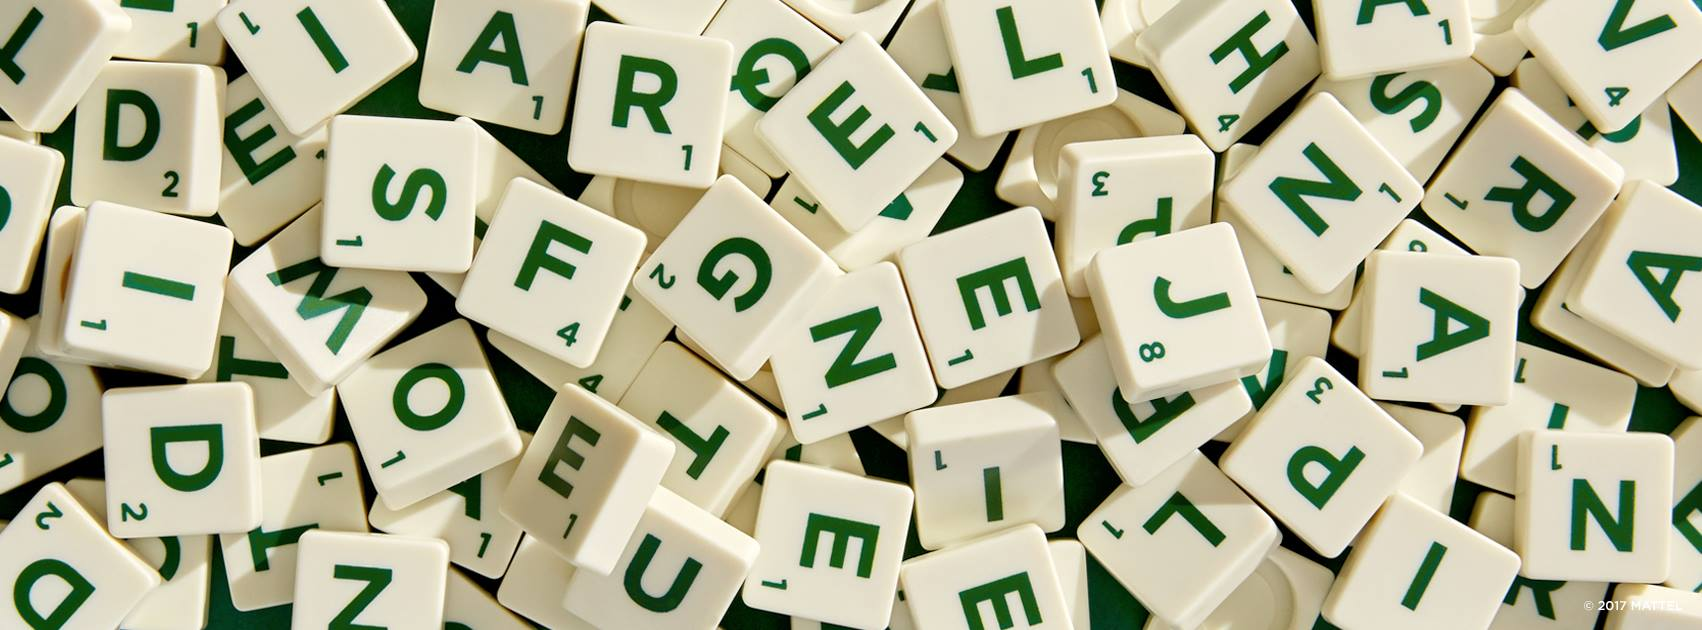
Now let us take our current NLP skills a step further by Tokenizing and Sequencing a bigger corpus of text , specifically reviews from the Amazon and Yelp website !! 

### About the Dataset 

We shall use a dataset containing Amazon and Yelp reviews of products and restaurants. This dataset was originally extracted from kaggle.
The dataset includes reviews, and each review is labelled as 0 (bad) or 1 (good). However, in this Notebook, we will only work with the reviews, not the labels, to practice tokenizing and sequencing the text.

### Example of good reviews: 😃

-This is hands down the best phone I've ever had.<br>
-Four stars for the food & the guy in the blue shirt for his great vibe & still letting us in to eat !

### Example of bad reviews: 😡

-A lady at the table next to us found a live green caterpillar In her salad. <br>
-If you plan to use this in a car forget about it.

# Setup

In [2]:
# Import Tokenizer and pad_sequences
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Import numpy and pandas
import numpy as np
import pandas as pd

### Get dataset (corpus of text)

the original dataset can be foud here : <br>
https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P <br><br>

However we shall be using a refined version which belongs to Udacity

In [3]:
path = tf.keras.utils.get_file('reviews.csv', 
                               'https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P')
print (path)

131072/127831 [==============================] - 0s 1us/step
/Users/apple/.keras/datasets/reviews.csv


### Get the dataset 

Each row in the csv file is a separate review.

The csv file has 2 columns:

text (the review)
sentiment (0 or 1 indicating a bad or good review)

In [5]:
# Read the csv file
dataset = pd.read_csv(path)

# Review the first few entries in the dataset
dataset.head()

,Unnamed: 0,text,sentiment
0,0,So there is no way for me to plug it in here i...,0
1,1,Good case Excellent value.,1
2,2,Great for the jawbone.,1
3,3,Tied to charger for conversations lasting more...,0
4,4,The mic is great.,1


### Get the reviews from the csv file 

In [6]:
# Get the reviews from the text column
reviews = dataset['text'].tolist()

### Tokenize the text

We create the Tokenizer, specify the OOV token, tokenize the text, then inspect the word index.

In [7]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(reviews)

word_index = tokenizer.word_index
print(len(word_index))
print(word_index)


3261
{'<OOV>': 1, 'the': 2, 'and': 3, 'i': 4, 'a': 5, 'it': 6, 'to': 7, 'is': 8, 'was': 9, 'this': 10, 'of': 11, 'not': 12, 'for': 13, 'my': 14, 'in': 15, 'with': 16, 'very': 17, 'good': 18, 'great': 19, 'phone': 20, 'that': 21, 'on': 22, 'have': 23, 'you': 24, 'food': 25, 'had': 26, 'place': 27, 'so': 28, 'but': 29, 'service': 30, 'are': 31, 'be': 32, 'we': 33, 'all': 34, 'as': 35, 'at': 36, 'like': 37, 'they': 38, 'time': 39, 'back': 40, 'one': 41, 'were': 42, 'quality': 43, 'would': 44, 'really': 45, 'here': 46, 'if': 47, 'from': 48, 'well': 49, 'your': 50, 'just': 51, 'product': 52, 'up': 53, 'best': 54, "don't": 55, 'no': 56, 'will': 57, 'an': 58, 'there': 59, 'go': 60, 'me': 61, 'has': 62, 'only': 63, 'also': 64, 'works': 65, "i've": 66, 'out': 67, 'headset': 68, 'nice': 69, 'ever': 70, 'battery': 71, "it's": 72, 'sound': 73, 'than': 74, 'use': 75, 'or': 76, 'when': 77, "i'm": 78, 'our': 79, 'get': 80, 'what': 81, 'their': 82, 'after': 83, 'love': 84, 'been': 85, 'did': 86, 'exce

## Generate sequences for the reviews 

Generate a sequence for each review. Set the max length to match the longest review. Add the padding zeros at the end of the review for reviews that are not as long as the longest one.

In [8]:
sequences = tokenizer.texts_to_sequences(reviews)
padded_sequences = pad_sequences(sequences, padding='post')

# What is the shape of the vector containing the padded sequences?
# The shape shows the number of sequences and the length of each one.
print(padded_sequences.shape)

# What is the first review?
print (reviews[0])

# Show the sequence for the first review
print(padded_sequences[0])

# Try printing the review and padded sequence for other elements.

(1992, 139)
So there is no way for me to plug it in here in the US unless I go by a converter.
[  28   59    8   56  142   13   61    7  269    6   15   46   15    2
  149  449    4   60  113    5 1429    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0]
